In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost
import math
from sklearn.linear_model import LinearRegression
# from sklearn import cross_validation, tree, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score
from scipy.stats import pearsonr

In [13]:
#Reading the data
data = pd.read_csv('house_data.csv')

In [6]:
print(data.shape)
print(data.columns)


(21613, 21)
Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [11]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [25]:
# Checking Null Values
data.isnull().any(axis=1).sum()

0

In [57]:
features = data.iloc[:,3:].columns.tolist()
target = data.iloc[:,2].name

In [58]:
corr = {}

for f in features:
    d2 = data[[f,target]]
    x = d2[f].values
    y = d2[target].values
    corr[f] = pearsonr(x,y)[0]
    
corr = pd.DataFrame(corr,index=['Value']).T
corr = corr.sort_values('Value',ascending = False)
corr.reset_index(inplace=True)
corr = corr.rename(columns={'index':'features'})
corr.shape

(18, 2)

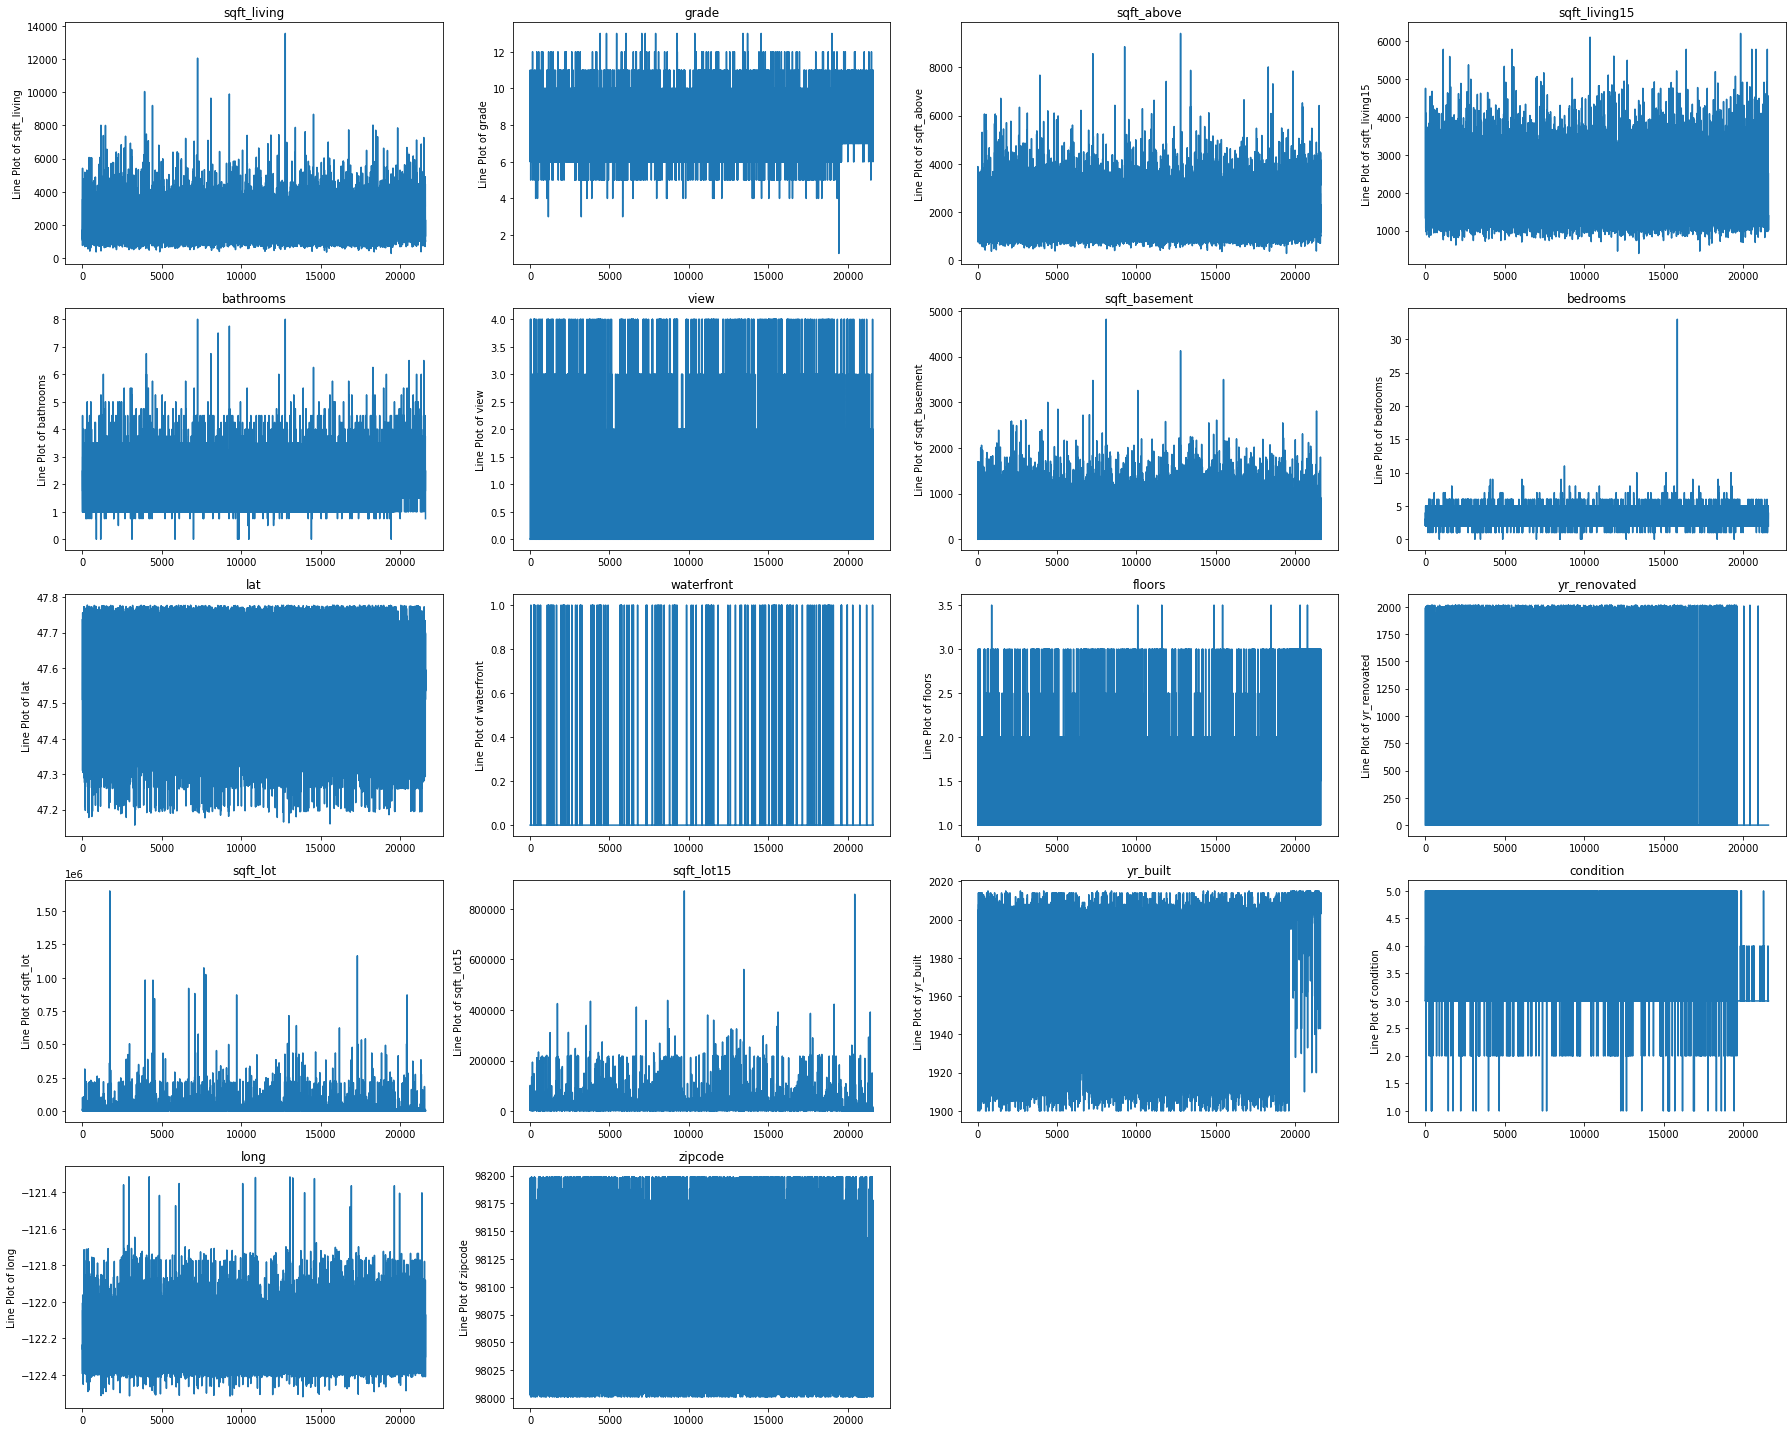

In [71]:
# Calculate the number of rows and columns for the subplots
num_rows = 5
num_cols = 4

num_plots = corr.shape[0]

# Create a figure and axes for the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(25, 20))

# Flatten the axes array to easily iterate over the subplots
axes = axes.flatten()

# Iterate over each column and plot in a separate subplot
for i, column in enumerate(corr['features']):
#     print(column)
    # Select the current subplot
    ax = axes[i]

    # Plot the column data
    ax.plot(data[column])
    ax.set_ylabel('Line Plot of '+column)


    # Set the subplot title
    ax.set_title(column)

# Remove any unused subplots
for i in range(num_plots, num_rows * num_cols):
    fig.delaxes(axes[i])

# Adjust the spacing between subplots
fig.tight_layout()

# Display the plot
plt.show()

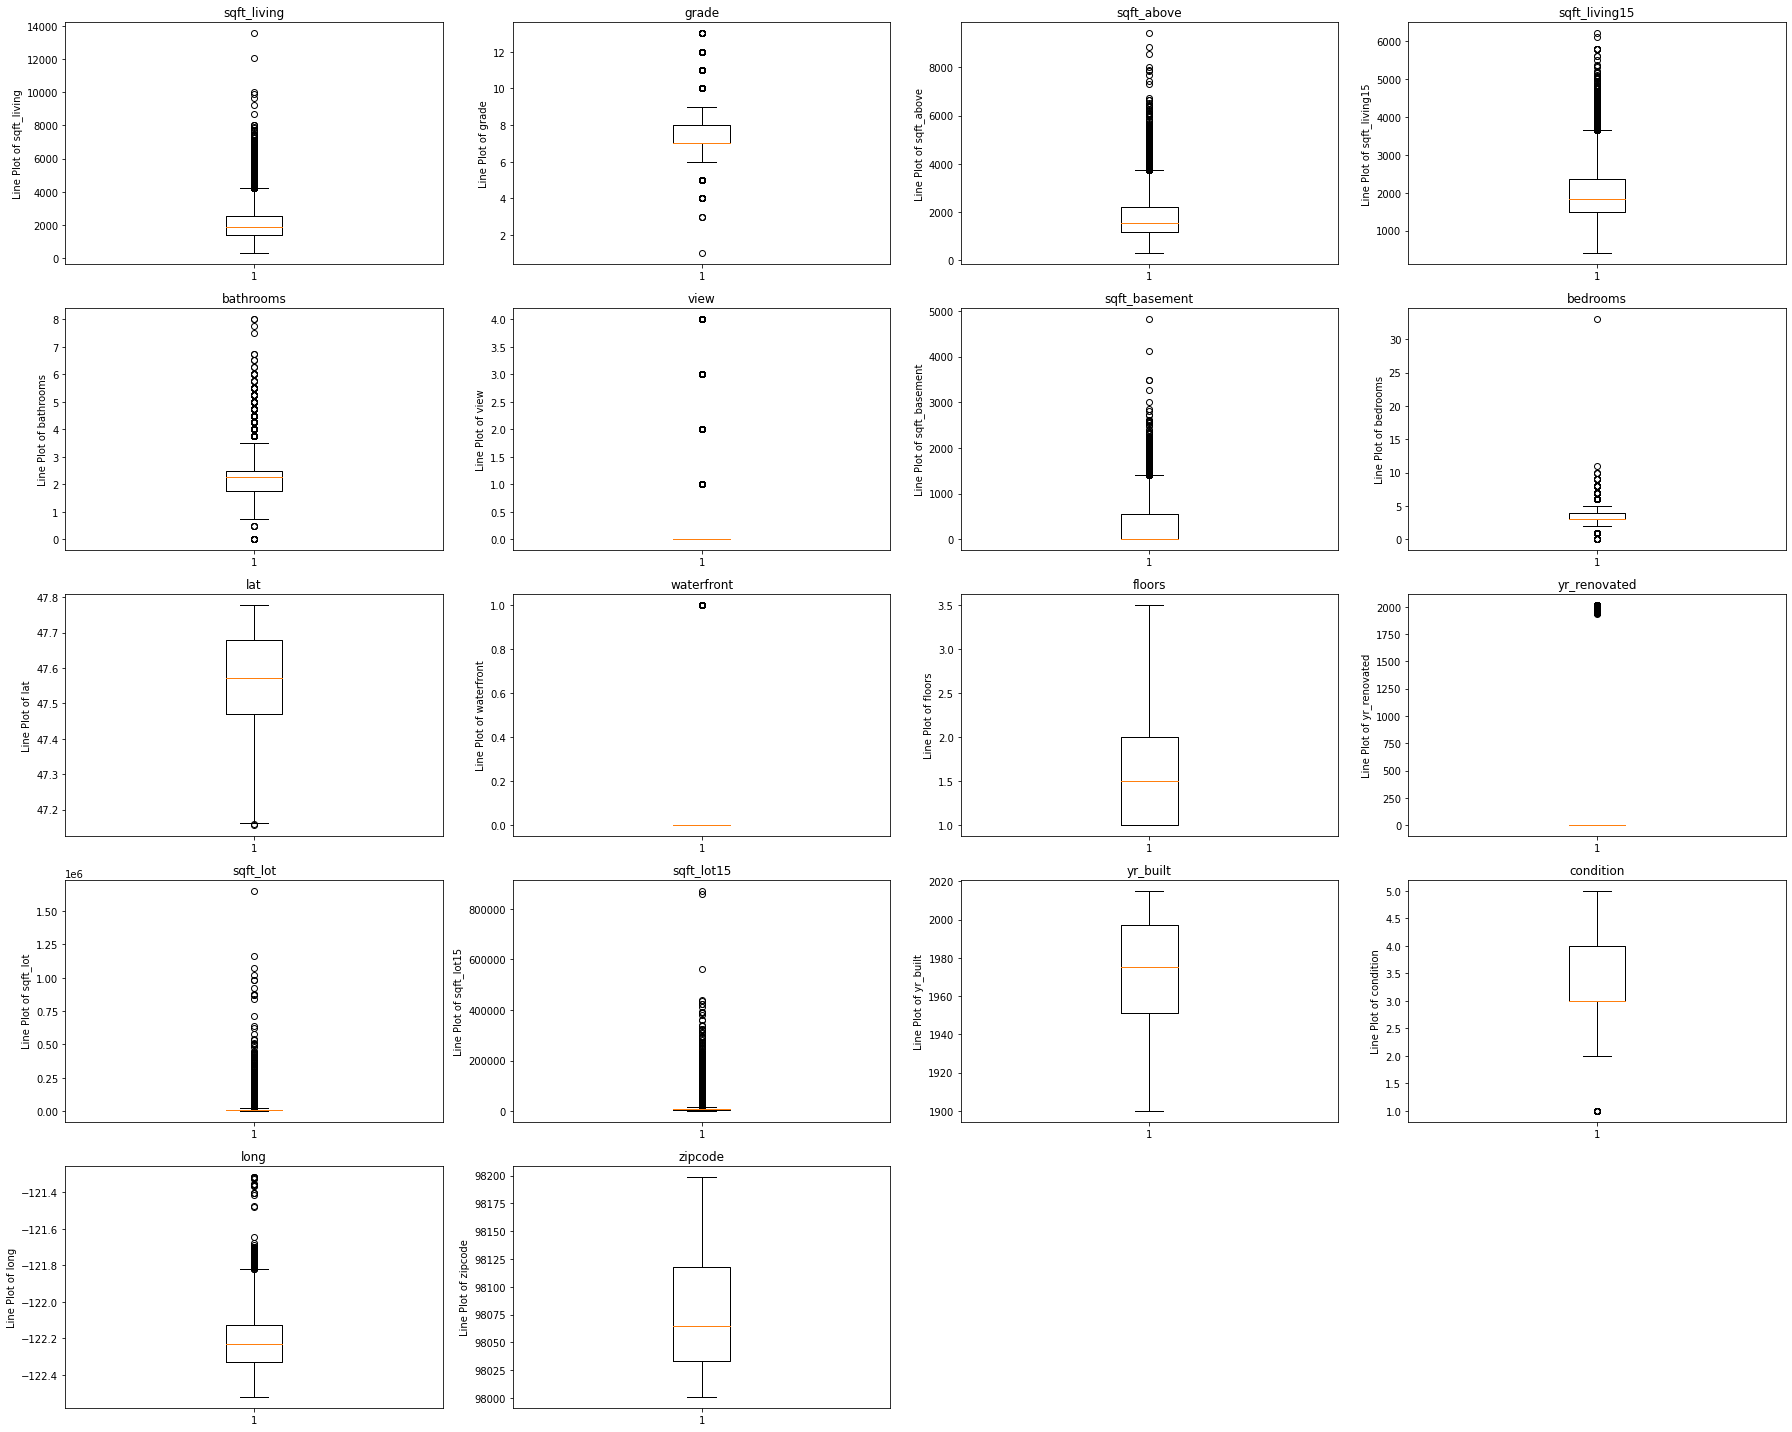

In [72]:
# Calculate the number of rows and columns for the subplots
num_rows = 5
num_cols = 4

num_plots = corr.shape[0]

# Create a figure and axes for the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(25, 20))

# Flatten the axes array to easily iterate over the subplots
axes = axes.flatten()

# Iterate over each column and plot in a separate subplot
for i, column in enumerate(corr['features']):
#     print(column)
    # Select the current subplot
    ax = axes[i]

    # Plot the column data
    ax.boxplot(data[column])
    ax.set_ylabel('Line Plot of '+column)


    # Set the subplot title
    ax.set_title(column)

# Remove any unused subplots
for i in range(num_plots, num_rows * num_cols):
    fig.delaxes(axes[i])

# Adjust the spacing between subplots
fig.tight_layout()

# Display the plot
plt.show()

In [75]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [86]:
data2 = data.drop(['id','date'],axis=1)

In [87]:
data2.dtypes

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [91]:
def find_outliers(df):
    df2 = df.copy()
    cols = list(df.columns)
    cols.remove('price')
#     print(cols)
    outlier_df = pd.DataFrame()
    clean_df = pd.DataFrame()
    df2['outlier']=''
    df2['column_value'] = ''
    for col in cols:
        q3 = np.quantile(df2[col],0.8)
        q1 = np.quantile(df2[col],0.2)
        iqr = q3-q1

        lower_range = q1 - (iqr*1.5)
        upper_range = q3 + (iqr*1.5)
        
        df2.loc[(df2[col]<lower_range)|(df2[col]>upper_range),['outlier','column_value']] = 'yes',col
        
    outlier_df = df2.loc[df2['outlier']=='yes']
    clean_df = df2.loc[df2['outlier']!='yes']
        
    print('outlier_df:',outlier_df.shape)
    print('clean_df:',clean_df.shape)

    return outlier_df,clean_df

In [92]:
outlier_df,clean_df = find_outliers(data2)

outlier_df: (5957, 21)
clean_df: (15656, 21)


In [140]:
X = data2.drop(['price'],axis=1)
y = data2['price']

In [141]:
from sklearn.preprocessing import StandardScaler

In [155]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data2)
scaled_df = pd.DataFrame(scaled_data, columns=data2.columns)

X = scaled_df.drop(['price'],axis=1)
y = scaled_df['price']

In [156]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [158]:
y_train.head()

6325    -0.585882
13473   -0.771108
17614   -0.848739
16970   -0.686667
20868   -0.166399
Name: price, dtype: float64

In [159]:
dt_regressor = DecisionTreeRegressor()
lr_regressor = LinearRegression()
rf_regressor = RandomForestRegressor()
svr_regressor = SVR()
xgb_regressor = XGBRegressor()

In [161]:
dt_regressor.fit(X_train, y_train)
lr_regressor.fit(X_train, y_train)
rf_regressor.fit(X_train, y_train)
svr_regressor.fit(X_train, y_train)
xgb_regressor.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [162]:
dt_predictions = dt_regressor.predict(X_test)
lr_predictions = lr_regressor.predict(X_test)
rf_predictions = rf_regressor.predict(X_test)
svr_predictions = svr_regressor.predict(X_test)
xgb_predictions = xgb_regressor.predict(X_test)

In [ ]:
scaler.inverse_transform(y_test)


In [136]:
np.sqrt(mean_squared_error(y_test, xgb_predictions))

0.3886730759483122

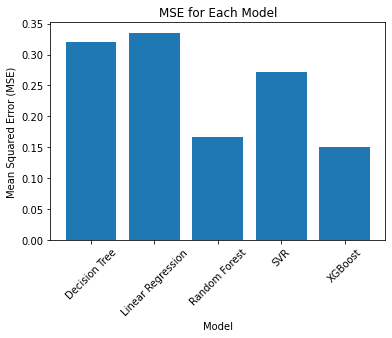

In [138]:
mse_dt = mean_squared_error(y_test, dt_predictions)
mse_lr = mean_squared_error(y_test, lr_predictions)
mse_rf = mean_squared_error(y_test, rf_predictions)
mse_svr = mean_squared_error(y_test, svr_predictions)
mse_xgb = mean_squared_error(y_test, xgb_predictions)

mse_values = [mse_dt, mse_lr, mse_rf, mse_svr, mse_xgb]

model_names = ['Decision Tree', 'Linear Regression', 'Random Forest', 'SVR', 'XGBoost']

plt.bar(model_names, mse_values)
plt.xlabel('Model')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE for Each Model')
plt.xticks(rotation=45)
plt.show()

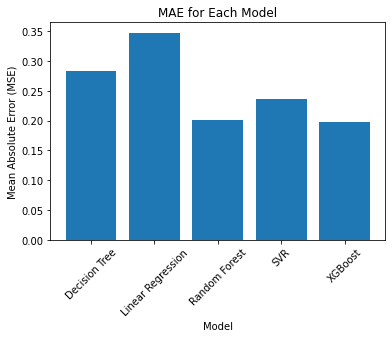

In [139]:
mae_dt = mean_absolute_error(y_test, dt_predictions)
mae_lr = mean_absolute_error(y_test, lr_predictions)
mae_rf = mean_absolute_error(y_test, rf_predictions)
mae_svr = mean_absolute_error(y_test, svr_predictions)
mae_xgb = mean_absolute_error(y_test, xgb_predictions)

mae_values = [mae_dt, mae_lr, mae_rf, mae_svr, mae_xgb]

model_names = ['Decision Tree', 'Linear Regression', 'Random Forest', 'SVR', 'XGBoost']

plt.bar(model_names, mae_values)
plt.xlabel('Model')
plt.ylabel('Mean Absolute Error (MSE)')
plt.title('MAE for Each Model')
plt.xticks(rotation=45)
plt.show()

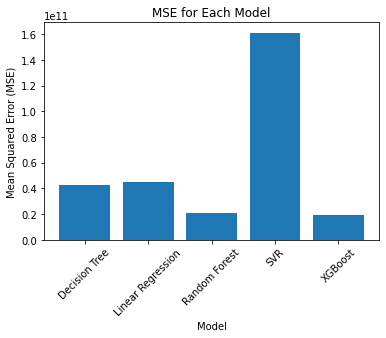